This is one of the gplearn examples I will use as a reference for genetic programming, it might
even find a place in discovering integrals for mathematical work, or as a component in an AI that I 
will name Major G, after the Meijer G-Functions used for evaluating generalized integrals.

In [1]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


Populating the interactive namespace from numpy and matplotlib


In [2]:
import pydotplus
pydotplus.find_graphviz()

{'circo': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\circo.exe',
 'dot': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe',
 'fdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\fdp.exe',
 'neato': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\neato.exe',
 'sfdp': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\sfdp.exe',
 'twopi': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\twopi.exe'}

C:\Users\dave\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


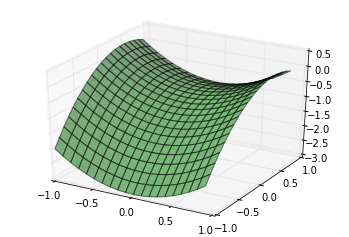

In [3]:
# Ground truth
x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [4]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

In [5]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13     386.19117972        7    0.33158080873   0.470286152255      3.01m
   1     9.91    1.66832489614        5   0.335361761359   0.488347149514      2.13m
   2     7.76      1.888657267        7   0.260765934398   0.565517599814      1.75m
   3     5.37    1.00018638338       17   0.223753461954   0.274920433701      1.49m
   4     4.69   0.878161643513       17     0.1450953226   0.158359554221      1.30m
   5      6.1    0.91987274474       11  0.0436125629701  0.0436125629701      1.17m
   6     7.18    1.09868887802       11  0.0436125629701  0.0436125629701      1.05m
   7     7.65    1.96650325011       11  0.0436125629701  0.0436125629701     56.84s
   8     8.02    1.02643443398       11  0.0436125629701  0.0436125629701  

SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div'), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, verbose=1, warm_start=False)

In [6]:
print est_gp._program

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


In [7]:
est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

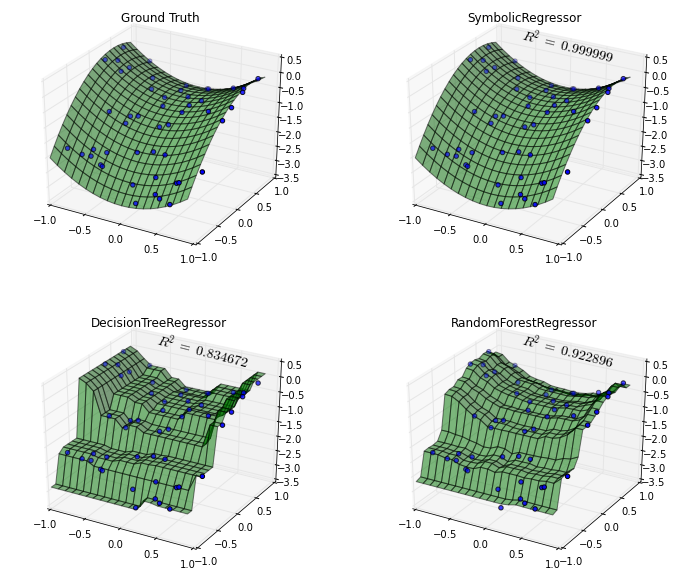

In [8]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)

plt.show()

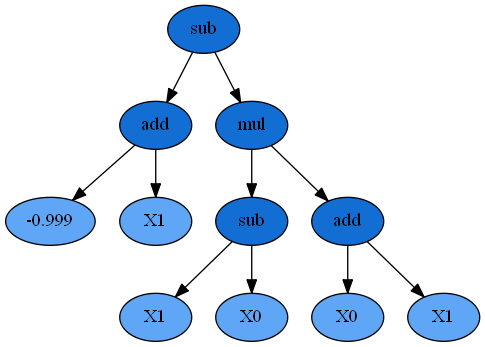

In [9]:
graph = pydotplus.graphviz.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

sub(add(-0.956, X1), mul(sub(X1, X0), add(X0, X1)))
Fitness: 0.15361256297


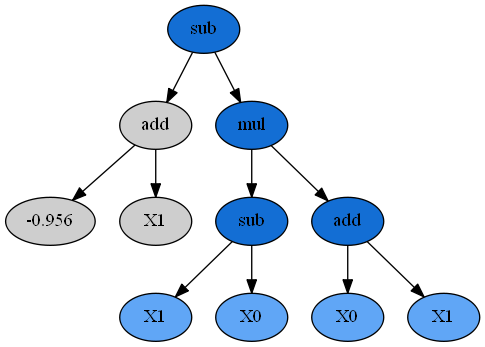

In [10]:
idx = est_gp._program.parents['parent_idx']
fade_nodes = est_gp._program.parents['parent_nodes']
print est_gp._programs[-2][idx]
print 'Fitness:', est_gp._programs[-2][idx].fitness_
graph = est_gp._programs[-2][idx].export_graphviz(fade_nodes=fade_nodes)
graph = pydotplus.graphviz.graph_from_dot_data(graph)
Image(graph.create_png())

In [11]:
from graphviz import Digraph

In [12]:
dot = Digraph(comment='The Round Table')

In [13]:
dot